In [490]:
import pandas as pd
import numpy as np

In [491]:
bankData = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
bankData.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [492]:
#eyeballing the data showed one anomoly

# 1) Experience as negative 

In [493]:
bankData[bankData.Experience < 0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [494]:
# Treating the negative experiences as missing values.

In [495]:
saneData = bankData[bankData.Experience>=0]
saneData.count()

ID                    4948
Age                   4948
Experience            4948
Income                4948
ZIP Code              4948
Family                4948
CCAvg                 4948
Education             4948
Mortgage              4948
Personal Loan         4948
Securities Account    4948
CD Account            4948
Online                4948
CreditCard            4948
dtype: int64

In [496]:
saneData.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000
mean,2501.268795,45.557195,20.331043,73.814470,93151.573363,2.391471,1.935926,1.878941,56.634398,0.097009,0.104285,0.061035,0.597009,0.294058
std,1443.277676,11.320735,11.311973,46.112596,2126.669017,1.148444,1.747694,0.839745,101.828885,0.296000,0.305660,0.239418,0.490549,0.455664
min,1.000000,24.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1254.750000,36.000000,10.750000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2497.500000,46.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.600000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [497]:
saneData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4948 entries, 0 to 4999
Data columns (total 14 columns):
ID                    4948 non-null int64
Age                   4948 non-null int64
Experience            4948 non-null int64
Income                4948 non-null int64
ZIP Code              4948 non-null int64
Family                4948 non-null int64
CCAvg                 4948 non-null float64
Education             4948 non-null int64
Mortgage              4948 non-null int64
Personal Loan         4948 non-null int64
Securities Account    4948 non-null int64
CD Account            4948 non-null int64
Online                4948 non-null int64
CreditCard            4948 non-null int64
dtypes: float64(1), int64(13)
memory usage: 579.8 KB


In [498]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

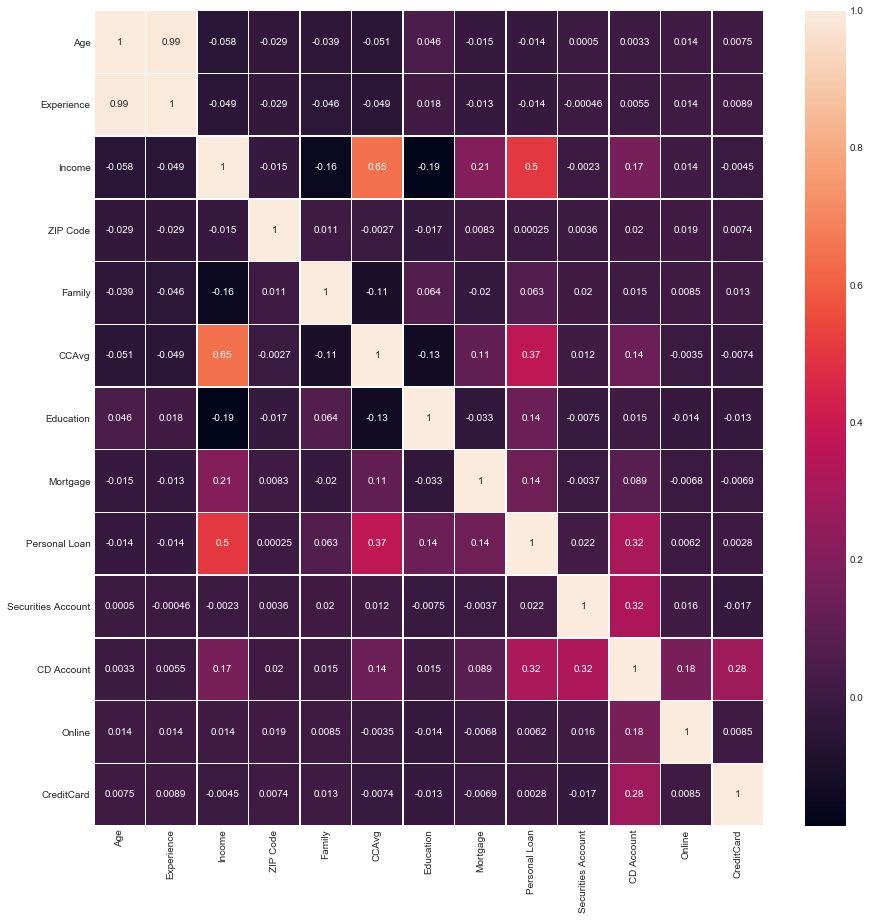

In [499]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(saneData.iloc[:,1:].corr(),annot=True,linewidths=0.5,ax=ax);

In [500]:
# Age has almost 100% correlation to experience...so we are going to use age to find missing values in experience

In [501]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(saneData[['Age']],saneData['Experience'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [502]:
print(regression_model.score(saneData[['Age']],saneData['Experience']))

0.9882377704069136


In [503]:
experiences = regression_model.predict(bankData[bankData.Experience<0][['Age']])
experiences

array([-0.08907764, -1.08240969, -1.08240969,  2.89091851, -1.08240969,
       -0.08907764, -0.08907764, -0.08907764, -1.08240969, -1.08240969,
       -0.08907764, -2.07574174, -1.08240969, -1.08240969, -1.08240969,
       -2.07574174, -1.08240969, -0.08907764, -0.08907764, -0.08907764,
       -0.08907764, -2.07574174, -1.08240969, -0.08907764, -2.07574174,
       -2.07574174, -1.08240969, -1.08240969, -2.07574174, -0.08907764,
        3.88425056, -2.07574174, -2.07574174,  0.90425441, -0.08907764,
       -0.08907764, -0.08907764, -2.07574174, -1.08240969, -1.08240969,
       -2.07574174, -1.08240969, -0.08907764, -0.08907764,  3.88425056,
       -1.08240969, -2.07574174, -2.07574174, -0.08907764, -1.08240969,
       -0.08907764,  3.88425056])

In [504]:
experiences = experiences.round().astype(int)

In [505]:
dataToFind = bankData[bankData.Experience<0]

In [506]:
dataToFind.count()

ID                    52
Age                   52
Experience            52
Income                52
ZIP Code              52
Family                52
CCAvg                 52
Education             52
Mortgage              52
Personal Loan         52
Securities Account    52
CD Account            52
Online                52
CreditCard            52
dtype: int64

In [507]:
bankData.count()

ID                    5000
Age                   5000
Experience            5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64

In [508]:
bankData.drop(bankData[bankData.Experience<0].index.values,inplace=True,axis=0)

In [509]:
experiences[experiences<0]=0

In [510]:
dataToFind['Experience'] = experiences

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [511]:
dataToFind[dataToFind.Experience<0].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [512]:
# Values which are negative still are going to be replaced with 0 . In other words treated as no experience
dataToFind[dataToFind['Experience']<0]['Experience']=0

In [513]:
bankData = bankData.append(dataToFind)

In [514]:
del saneData

In [515]:
del dataToFind

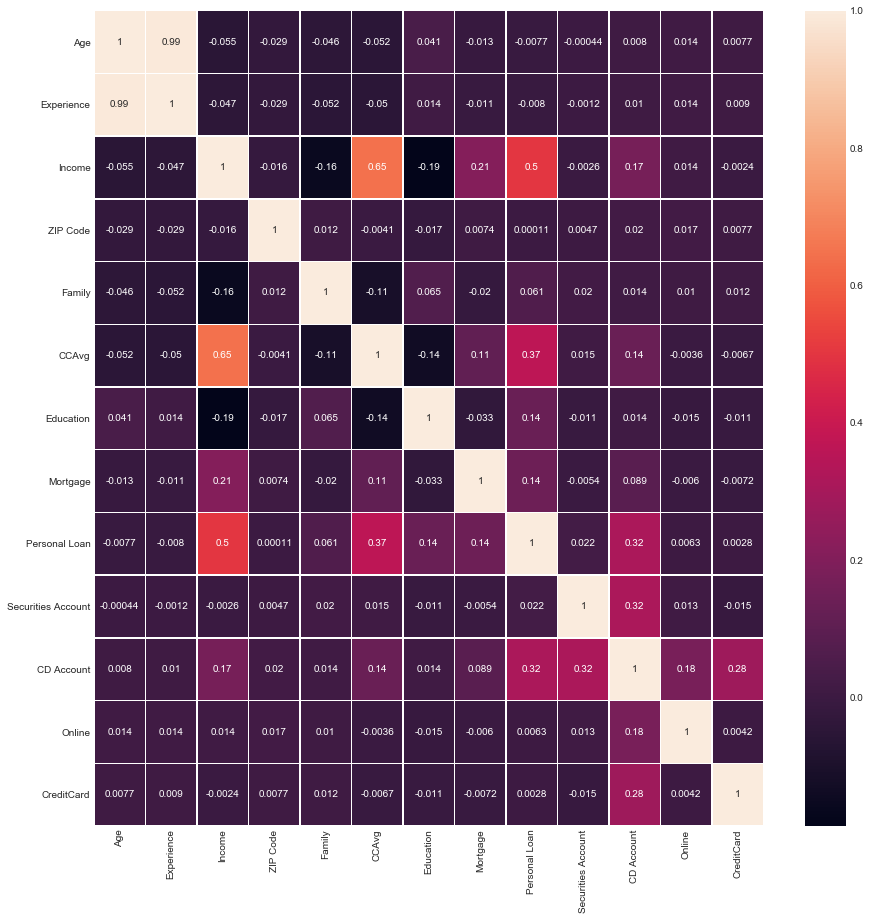

In [516]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(bankData.iloc[:,1:].corr(),annot=True,linewidths=0.5,ax=ax);

#### 1) Cheking for duplicates

In [517]:
bankData.loc[bankData.loc[:,bankData.columns != 'ID'].duplicated(keep='first')==True]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [518]:
# No duplicates found

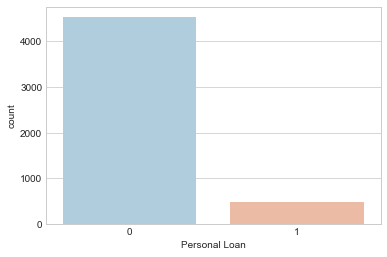

In [519]:
sns.set_style('whitegrid')
sns.countplot(x='Personal Loan',data=bankData,palette='RdBu_r')

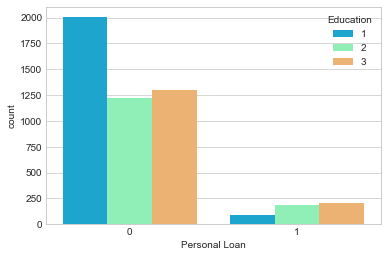

In [520]:
sns.set_style('whitegrid')
sns.countplot(x='Personal Loan',data=bankData,palette='rainbow',hue='Education')

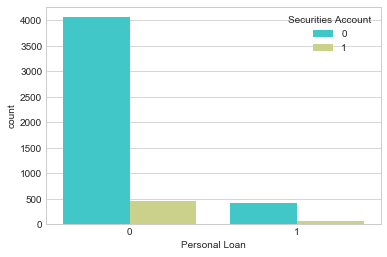

In [521]:
sns.set_style('whitegrid')
sns.countplot(x='Personal Loan',data=bankData,palette='rainbow',hue='Securities Account')

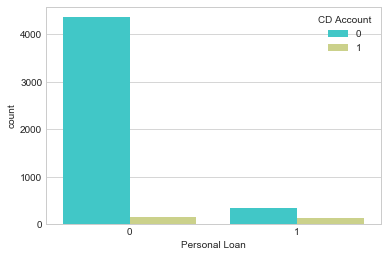

In [522]:
sns.set_style('whitegrid')
sns.countplot(x='Personal Loan',data=bankData,palette='rainbow',hue='CD Account')

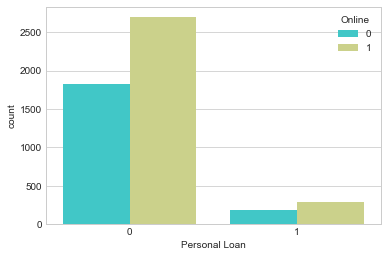

In [523]:
sns.set_style('whitegrid')
sns.countplot(x='Personal Loan',data=bankData,palette='rainbow',hue='Online')

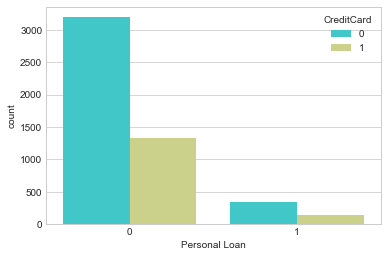

In [524]:
sns.set_style('whitegrid')
sns.countplot(x='Personal Loan',data=bankData,palette='rainbow',hue='CreditCard')

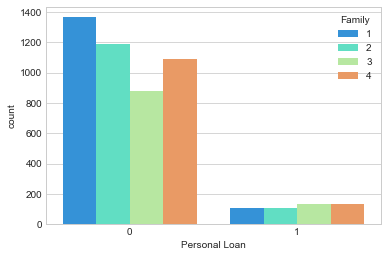

In [525]:
sns.set_style('whitegrid')
sns.countplot(x='Personal Loan',data=bankData,palette='rainbow',hue='Family')

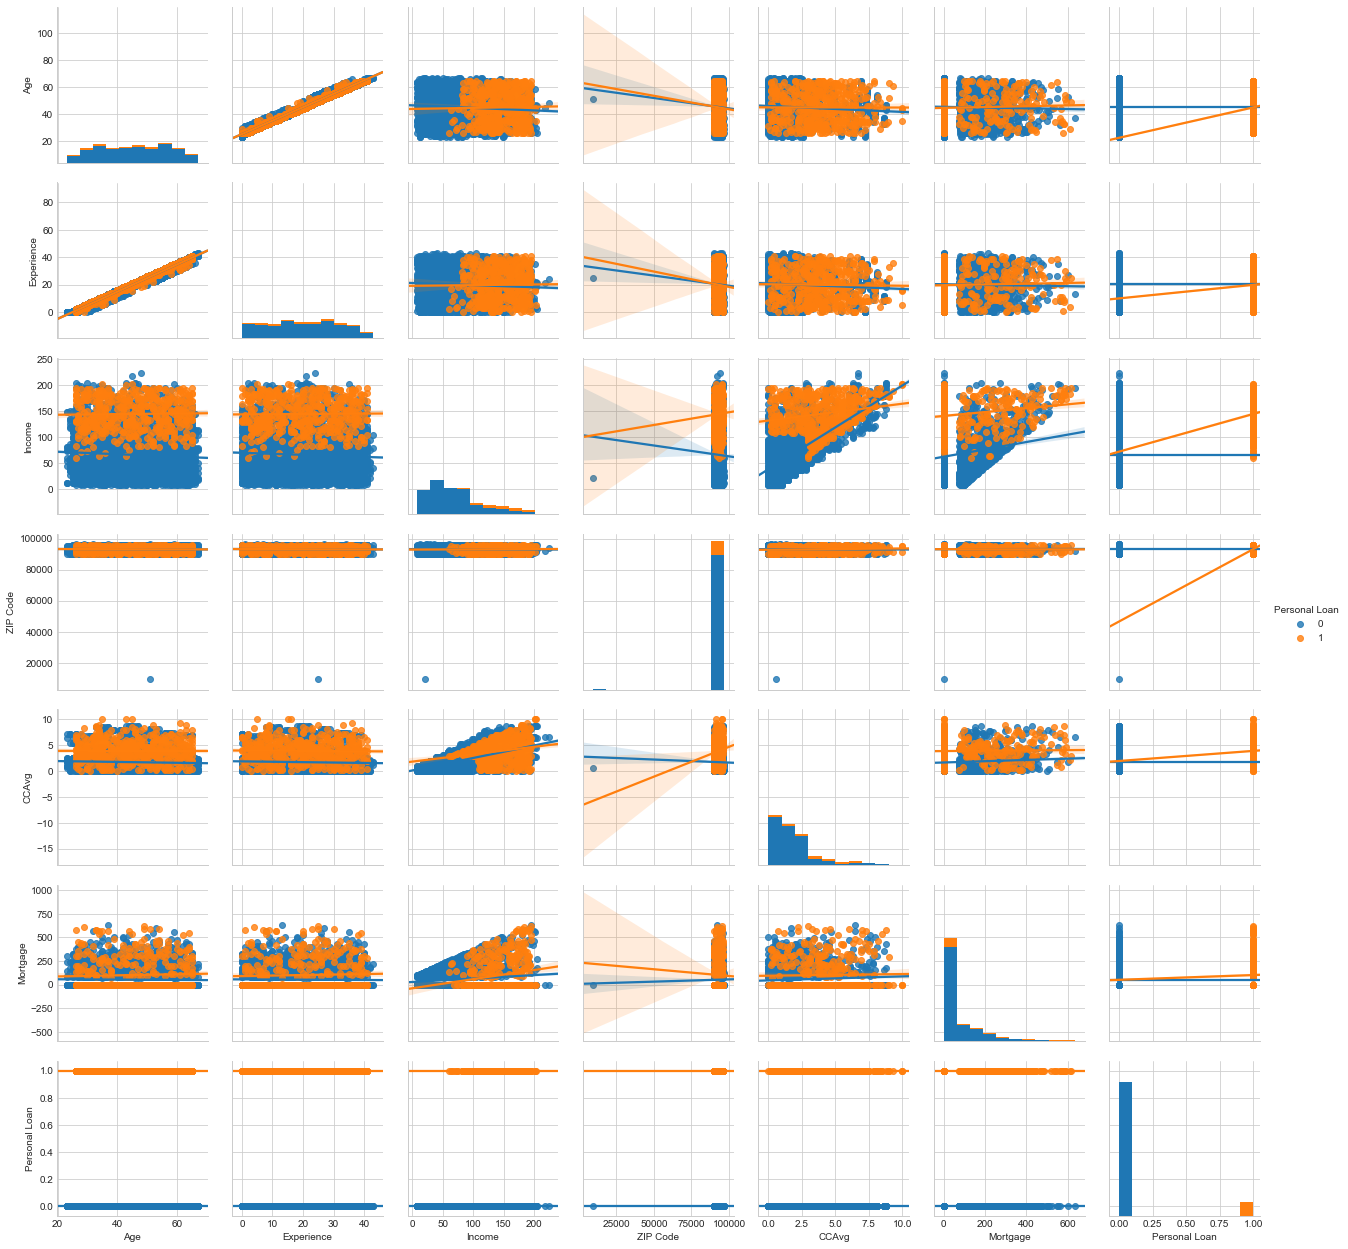

In [526]:
sns.pairplot(bankData.iloc[:,[1,2,3,4,6,8,9]],hue='Personal Loan',kind='reg')

### Noticable Observations

###### 1) Less no of samples available to study those who have availed personal loan in comparison to those who have'nt
###### 2) As education level increases tendency to say yes for a personal loan is more
###### 3) As income,experience,age increases tendency to say yes for a personal loan is more
###### 4) Higher income ppl at bigger zip codes say yes to personal loan more than others

# Logistic Regression

### Converting categorical variables into dummy columns 

In [527]:
logisticDF = bankData

In [528]:
EducationCol = pd.get_dummies(logisticDF['Education'],drop_first=True,prefix='Education_')
SecAcc = pd.get_dummies(logisticDF['Securities Account'],drop_first=True,prefix='SecAcc_')
CdAcc = pd.get_dummies(logisticDF['CD Account'],drop_first=True,prefix='CDAcc_')
OnlineAcc = pd.get_dummies(logisticDF['Online'],drop_first=True,prefix='Online_')
cc = pd.get_dummies(logisticDF['CreditCard'],drop_first=True,prefix='cc_')
FamilyCol = pd.get_dummies(logisticDF['Family'],drop_first=True,prefix='Family_')

In [529]:
logisticDF.drop(['Education','Securities Account','CD Account','Online','CreditCard','Family','ID'],axis=1,inplace=True)

In [530]:
logisticDF = pd.concat([logisticDF,EducationCol,SecAcc,CdAcc,OnlineAcc,cc,FamilyCol],axis=1)
logisticDF.head()

,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Personal Loan,Education__2,Education__3,SecAcc__1,CDAcc__1,Online__1,cc__1,Family__2,Family__3,Family__4
0,25,1,49,91107,1.6,0,0,0,0,1,0,0,0,0,0,1
1,45,19,34,90089,1.5,0,0,0,0,1,0,0,0,0,1,0
2,39,15,11,94720,1.0,0,0,0,0,0,0,0,0,0,0,0
3,35,9,100,94112,2.7,0,0,1,0,0,0,0,0,0,0,0
4,35,8,45,91330,1.0,0,0,1,0,0,0,0,1,0,0,1


In [531]:
from sklearn.model_selection import train_test_split

In [532]:
X_train, X_test, y_train, y_test = train_test_split(logisticDF.drop('Personal Loan',axis=1), 
                                                    logisticDF['Personal Loan'], test_size=0.30, 
                                                    random_state=101)

In [533]:
from sklearn.linear_model import LogisticRegression

In [534]:
logmodel = LogisticRegression()
model = logmodel.fit(X_train,y_train)

In [535]:
predictions = logmodel.predict(X_test)

In [536]:
predictions

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

### Evaluation

In [537]:
logmodel.score(X_test,y_test)

0.92

In [538]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

In [539]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.94      0.98      0.96      1362
          1       0.61      0.36      0.45       138

avg / total       0.91      0.92      0.91      1500



In [540]:
confusion_matrix(y_test,predictions)

array([[1330,   32],
       [  88,   50]], dtype=int64)

In [541]:
print('True Positive rate here is : 36 %')

True Positive rate here is : 36 %


## Features tuned KNN

In [542]:
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [543]:
n_estimators = np.arange(1,51)
weights = ['uniform', 'distance']
algorithm = ['ball_tree', 'kd_tree','brute']

# Create the random grid
random_grid = {'n_neighbors': n_estimators,
               'weights': weights,
               'algorithm': algorithm               
               }

print(random_grid)

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute']}


In [544]:
knn = KNeighborsClassifier()
GS = GridSearchCV(knn,random_grid,cv=10)

In [545]:
GS.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [546]:
knnPredictions = GS.predict(X_test)
knnPredictions

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [547]:
confusion_matrix(y_test,knnPredictions)

array([[1343,   19],
       [ 123,   15]], dtype=int64)

In [548]:
GS.score(X_test,y_test)

0.9053333333333333

In [549]:
GS.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 4, 'weights': 'uniform'}

In [550]:
print('True Positive rate here is : 10.8 %')

True Positive rate here is : 10.8 %


## Naive Based

In [551]:
from sklearn.naive_bayes import GaussianNB

In [552]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None)

In [553]:
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

             precision    recall  f1-score   support

          0       0.95      0.92      0.94      1362
          1       0.43      0.57      0.49       138

avg / total       0.91      0.89      0.90      1500

[[1258  104]
 [  60   78]]


In [554]:
model.score(X_test,y_test)

0.8906666666666667

In [555]:
print('True Positive rate here is : 56 %')

True Positive rate here is : 56 %


### Though accuracy wise logistic holds the edge....the naive based method trumps others in its true postive rate which is what is needed as per the question....hence naive based is the most suited in this case

In [556]:
####